In [1]:
# !pip install opencv-python

In [2]:
# !pip install tensorflow_addons

In [3]:
# !pip install scikit-image

In [1]:
import numpy as np
import cv2
from PIL import Image
from skimage.util import random_noise
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow_addons as tfa

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
import pandas as pd
import json

# with open('data/malaria/training.json') as f_in:
#     data_train = json.load(f_in)

# with open('data/malaria/test.json') as f_in:
#     data_test = json.load(f_in)


In [4]:
# cells_train_df = {
#     'path':[],
#     'min_r':[],
#     'min_c':[],
#     'max_r':[],
#     'max_c':[],
#     'r_len':[],
#     'c_len':[],
#     'category':[]
# }
# for image in data_train:    
#     #Populate cells_df dict
#     for box in image['objects']:
#         cells_train_df['path'].append(image['image']['pathname'])
#         cells_train_df['min_r'].append(box['bounding_box']['minimum']['r'])
#         cells_train_df['min_c'].append(box['bounding_box']['minimum']['c'])
#         cells_train_df['max_r'].append(box['bounding_box']['maximum']['r'])
#         cells_train_df['max_c'].append(box['bounding_box']['maximum']['c'])
#         cells_train_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
#         cells_train_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
#         cells_train_df['category'].append(box['category'])

In [5]:
# cells_test_df = {
#     'path':[],
#     'min_r':[],
#     'min_c':[],
#     'max_r':[],
#     'max_c':[],
#     'r_len':[],
#     'c_len':[],
#     'category':[]
# }
# for image in data_test:    
#     #Populate cells_df dict
#     for box in image['objects']:
#         cells_test_df['path'].append(image['image']['pathname'])
#         cells_test_df['min_r'].append(box['bounding_box']['minimum']['r'])
#         cells_test_df['min_c'].append(box['bounding_box']['minimum']['c'])
#         cells_test_df['max_r'].append(box['bounding_box']['maximum']['r'])
#         cells_test_df['max_c'].append(box['bounding_box']['maximum']['c'])
#         cells_test_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
#         cells_test_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
#         cells_test_df['category'].append(box['category'])

In [6]:
# cells_train_df = pd.DataFrame(cells_train_df)
# cells_test_df = pd.DataFrame(cells_test_df)

In [7]:
# cells_train_df['category'].value_counts()

In [8]:
# indexes = cells_train_df[(cells_train_df.category == 'red blood cell') | (cells_train_df.category == 'difficult') | (cells_train_df.category == 'leukocyte')].index
# cells_train_df = cells_train_df.drop(indexes)

In [9]:
# indexes = cells_test_df[(cells_test_df.category == 'red blood cell') | (cells_test_df.category == 'difficult') | (cells_test_df.category == 'leukocyte')].index
# cells_test_df = cells_test_df.drop(indexes)

In [10]:
path_to_dataset = os.path.join("data")

path_to_dataset_train = os.path.join(path_to_dataset, "train")
path_to_dataset_test = os.path.join(path_to_dataset,  "test")
path_to_dataset_val = os.path.join(path_to_dataset,   "val")


#path_to_mini_dataset= os.path.join("..", "test_data", "0_test_miniset")#, "0_test_miniset")

batch_size = 16 #None #16 #32
img_height = 224
img_width = 224

X_train_ds = image_dataset_from_directory(
  path_to_dataset_train,
  #validation_split=0.2,
  #subset="training",
  label_mode="int",
  color_mode="rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7635 files belonging to 29 classes.


In [11]:
train_folders = []
# iterate over files in that directory
for filename in os.scandir('data/train'):
    if filename.is_file():
        print(filename.path)
    else:
        train_folders.append(filename.name)

In [12]:
val_folders = []
# iterate over files in that directory
for filename in os.scandir('data/val'):
    if filename.is_file():
        print(filename.path)
    else:
        val_folders.append(filename.name)

In [13]:
test_folders = []
# iterate over files in that directory
for filename in os.scandir('data/test'):
    if filename.is_file():
        print(filename.path)
    else:
        test_folders.append(filename.name)

In [14]:
food_arr_train = []
labels_train = []
working_images = []
for filename in train_folders:
    print(f'{filename} in progress')
    for file in os.scandir(f'data/train/{filename}'):
        # min_r, max_r = row['min_r'], row['max_r']
        # min_c, max_c = row['min_c'], row['max_c']
        #Load and transform
        full_image = cv2.imread(f"data/train/{filename}/{file.name}") # [min_r:max_r, min_c:max_c, :]
        if full_image is not None:
            image_flip = cv2.flip(full_image, 1)
            image_rot = cv2.rotate(full_image, cv2.ROTATE_90_CLOCKWISE)
            noise_img = random_noise(full_image, mode='gaussian', var=0.05**2)
            noise_img = (255*noise_img).astype(np.uint8)
            #resize
            full_resize = cv2.resize(full_image, (200,200))
            flip_resize = cv2.resize(image_flip, (200,200))
            rot_resize = cv2.resize(image_rot, (200,200))
            noise_resize = cv2.resize(noise_img, (200,200))
            #append
            food_arr_train.append(np.array(full_resize))
            food_arr_train.append(np.array(flip_resize))
            food_arr_train.append(np.array(rot_resize))
            food_arr_train.append(np.array(noise_resize))
            labels_train.append(filename)
            labels_train.append(filename)
            labels_train.append(filename)
            labels_train.append(filename)
            working_images.append(file.name)

apple in progress
blueberry in progress
strawberry in progress
avocado in progress
capsicum in progress
beef in progress
lettuce in progress
kiwi in progress
mushroom in progress
lemon in progress
onion in progress
cauliflower in progress
milk in progress
potato in progress
pork in progress
cucumber in progress
cabbage in progress
eggplant in progress
chicken in progress
broccoli in progress
celery in progress
banana in progress
grape in progress
zucchini in progress
white in progress
pineapple in progress
tomato in progress
orange in progress
carrot in progress


In [15]:
food_arr_test = []
labels_test = []
working_images_test = []
for filename in test_folders:
    print(f'{filename} in progress')
    for file in os.scandir(f'data/test/{filename}'):
        # min_r, max_r = row['min_r'], row['max_r']
        # min_c, max_c = row['min_c'], row['max_c']
        #Load and transform
        full_image = cv2.imread(f"data/test/{filename}/{file.name}") # [min_r:max_r, min_c:max_c, :]
        if full_image is not None:
            image_flip = cv2.flip(full_image, 1)
            image_rot = cv2.rotate(full_image, cv2.ROTATE_90_CLOCKWISE)
            noise_img = random_noise(full_image, mode='gaussian', var=0.05**2)
            noise_img = (255*noise_img).astype(np.uint8)
            #resize
            full_resize = cv2.resize(full_image, (200,200))
            flip_resize = cv2.resize(image_flip, (200,200))
            rot_resize = cv2.resize(image_rot, (200,200))
            noise_resize = cv2.resize(noise_img, (200,200))
            #append
            food_arr_test.append(np.array(full_resize))
            food_arr_test.append(np.array(flip_resize))
            food_arr_test.append(np.array(rot_resize))
            food_arr_test.append(np.array(noise_resize))
            labels_test.append(filename)
            labels_test.append(filename)
            labels_test.append(filename)
            labels_test.append(filename)
            working_images_test.append(file.name)

apple in progress
blueberry in progress
strawberry in progress
avocado in progress
capsicum in progress
beef in progress
lettuce in progress
kiwi in progress
mushroom in progress
lemon in progress
onion in progress
cauliflower in progress
milk in progress
potato in progress
pork in progress
cucumber in progress
cabbage in progress
eggplant in progress
chicken in progress
broccoli in progress
celery in progress
banana in progress
grape in progress
zucchini in progress
white in progress
pineapple in progress
tomato in progress
orange in progress
carrot in progress


In [16]:
missing = [x for x in test_folders if x not in train_folders]
missing

[]

In [17]:
missing2 = [x for x in train_folders if x not in test_folders]
missing2

[]

In [18]:
X_train = np.array(food_arr_train)
y_train = np.array(labels_train)
X_test = np.array(food_arr_test)
y_test = np.array(labels_test)

In [19]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [20]:
X.shape

(33128, 200, 200, 3)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

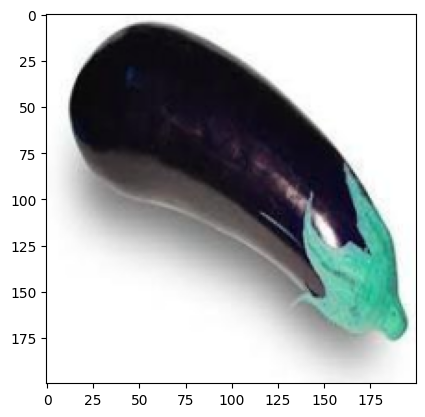

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [2]:
y_train = le.fit_transform(y_train.reshape(-1,1)).reshape(-1,1)


NameError: name 'le' is not defined

In [1]:
y_test = le.transform(y_test.reshape(-1,1)).reshape(-1,1)

NameError: name 'le' is not defined

In [27]:
num_classes = len(train_folders)
input_shape = (200, 200, 3)

In [28]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 20
image_size = 100  # We'll resize input images to this size
patch_size = 10  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

2023-03-16 00:23:44.668897: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [30]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [31]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 100 X 100
Patch size: 10 X 10
Patches per image: 100
Elements per patch: 300


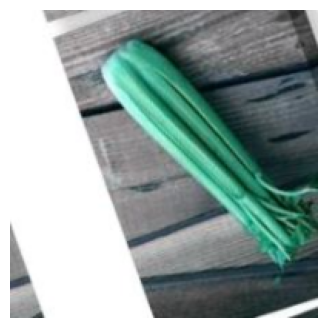

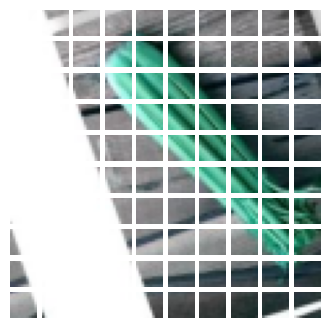

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [1]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


NameError: name 'layers' is not defined

In [34]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [35]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ]
    )

    checkpoint_filepath = os.path.join("models")
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.3,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/20
508/508 [==============================] - 307s 571ms/step - loss: 2.8086 - accuracy: 0.2519 - val_loss: 1.8014 - val_accuracy: 0.4650
Epoch 2/20
508/508 [==============================] - 268s 527ms/step - loss: 1.8124 - accuracy: 0.4611 - val_loss: 1.2917 - val_accuracy: 0.6064
Epoch 3/20
508/508 [==============================] - 262s 513ms/step - loss: 1.4233 - accuracy: 0.5785 - val_loss: 1.0923 - val_accuracy: 0.6634
Epoch 4/20
508/508 [==============================] - 291s 572ms/step - loss: 1.2055 - accuracy: 0.6387 - val_loss: 0.9226 - val_accuracy: 0.7217
Epoch 5/20
508/508 [==============================] - 262s 514ms/step - loss: 1.0477 - accuracy: 0.6824 - val_loss: 0.8488 - val_accuracy: 0.7368
Epoch 6/20
508/508 [==============================] - 262s 515ms/step - loss: 0.9473 - accuracy: 0.7119 - val_loss: 0.8154 - val_accuracy: 0.7497
Epoch 7/20
508/508 [==============================] - 275s 542ms/step - loss: 0.8757 - accuracy: 0.7325 - val_loss: 0.8212 -

Epoch 11/20
508/508 [==============================] - 322s 633ms/step - loss: 0.6449 - accuracy: 0.7963 - val_loss: 0.5897 - val_accuracy: 0.8210
Epoch 12/20
508/508 [==============================] - 265s 521ms/step - loss: 0.6131 - accuracy: 0.8091 - val_loss: 0.6273 - val_accuracy: 0.8160
Epoch 13/20
508/508 [==============================] - 265s 522ms/step - loss: 0.6076 - accuracy: 0.8136 - val_loss: 0.6338 - val_accuracy: 0.8054
Epoch 14/20
508/508 [==============================] - 250s 492ms/step - loss: 0.5583 - accuracy: 0.8251 - val_loss: 0.5352 - val_accuracy: 0.8369
Epoch 15/20
508/508 [==============================] - 249s 489ms/step - loss: 0.5181 - accuracy: 0.8355 - val_loss: 0.5770 - val_accuracy: 0.8325
Epoch 16/20
508/508 [==============================] - 256s 505ms/step - loss: 0.4917 - accuracy: 0.8491 - val_loss: 0.4979 - val_accuracy: 0.8478
Epoch 17/20
508/508 [==============================] - 265s 521ms/step - loss: 0.4796 - accuracy: 0.8497 - val_loss: 0

In [36]:
le.classes_

array(['apple', 'avocado', 'banana', 'beef', 'blueberry', 'broccoli',
       'cabbage', 'capsicum', 'carrot', 'cauliflower', 'celery',
       'chicken', 'cucumber', 'eggplant', 'grape', 'kiwi', 'lemon',
       'lettuce', 'milk', 'mushroom', 'onion', 'orange', 'pineapple',
       'pork', 'potato', 'strawberry', 'tomato', 'white', 'zucchini'],
      dtype='<U11')

In [37]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 100, 100, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 300)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 100, 64)      25664       ['patches_1[0][0]']          

                                                                                                  
 multi_head_attention_3 (MultiH  (None, 100, 64)     66368       ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 100, 64)      0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 100, 64)     128         ['add_6[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_7 (

 dense_14 (Dense)               (None, 100, 64)      8256        ['dropout_12[0][0]']             
                                                                                                  
 dropout_13 (Dropout)           (None, 100, 64)      0           ['dense_14[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 100, 64)      0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 100, 64)     128         ['add_13[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_hea

In [38]:
vit_classifier.save("vit_food")

INFO:tensorflow:Assets written to: vit_food/assets


INFO:tensorflow:Assets written to: vit_food/assets


In [39]:
reloaded_model = tf.keras.models.load_model("vit_food")

In [40]:
reloaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 100, 100, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 300)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 100, 64)      25664       ['patches_1[0][0]']          

                                                                                                  
 multi_head_attention_3 (MultiH  (None, 100, 64)     66368       ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 100, 64)      0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 100, 64)     128         ['add_6[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_7 (

 dense_14 (Dense)               (None, 100, 64)      8256        ['dropout_12[0][0]']             
                                                                                                  
 dropout_13 (Dropout)           (None, 100, 64)      0           ['dense_14[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 100, 64)      0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 100, 64)     128         ['add_13[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_hea

In [41]:
vit_classifier(X_test[0:1])

<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[ 2.9849849 ,  0.60195243,  1.4533406 , -3.1534383 , -2.1779652 ,
        -5.732034  , -2.9893265 , -4.732079  , -6.056352  , -3.3079624 ,
         0.59112996, -4.9922323 , -4.0365357 , -2.2158353 ,  2.2918515 ,
         5.1254187 , -0.9959169 ,  0.37275112, -5.2676806 , -3.1477778 ,
        -2.5365174 , -2.5948982 , -2.1097121 , -4.9578233 , -3.4063985 ,
        -2.4831946 , -2.097918  , -1.7578666 ,  0.02131814]],
      dtype=float32)>

In [42]:
y_test[0]

array([15])

In [43]:
new_vit_classifier = create_vit_classifier()

In [44]:
new_vit_classifier.load_weights("checkpoints/checkpoint")

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for checkpoints/checkpoint

In [51]:
np.squeeze(X_test[255:256]).shape

(200, 200, 3)

In [45]:
new_vit_classifier(X_test[255:256])

<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[-0.5833176 , -1.2149292 , -1.7497427 ,  1.102988  , -0.63900775,
        -0.80065477, -0.23170273,  0.11902915,  0.8108773 , -1.4879483 ,
        -0.9116807 ,  0.49801567, -1.9548285 , -0.16949931,  0.506906  ,
         0.65017354, -1.2512091 ,  0.27890733, -0.94543064, -1.9520397 ,
         0.06931763, -1.7053304 , -0.67498994,  1.1474032 , -1.4806887 ,
         0.07450539,  1.7095699 ,  0.49241474, -0.08017582]],
      dtype=float32)>

In [54]:
y_test[255][0]

9

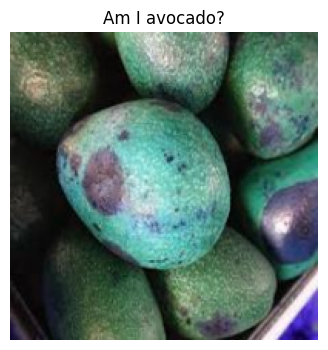

In [135]:
test_index = 600
plt.figure(figsize=(4, 4))
image = np.squeeze(X_test[test_index:test_index+1])
plt.imshow(image.astype("uint8"))
plt.axis("off")
plt.title(f'Am I {le.classes_[y_test[test_index][0]]}?');

In [47]:
vit_classifier.evaluate(X_train, y_train)

362/725 [=============>................] - ETA: 57s - loss: 0.1398 - accuracy: 0.9544

2023-03-16 01:56:19.252786: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at einsum_op_impl.h:502 : INVALID_ARGUMENT: Expected input 1 to have rank 4 but got: 1


InvalidArgumentError: Graph execution error:

Detected at node 'model/multi_head_attention_3/einsum/Einsum' defined at (most recent call last):
    File "/Users/cbeams/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/cbeams/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/cbeams/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/cbeams/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/cbeams/.pyenv/versions/3.10.6/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/wx/fdznh_y51_1gnn8tvkcxhsyh0000gn/T/ipykernel_20745/1470624533.py", line 39, in <module>
      history = run_experiment(vit_classifier)
    File "/var/folders/wx/fdznh_y51_1gnn8tvkcxhsyh0000gn/T/ipykernel_20745/1470624533.py", line 22, in run_experiment
      history = model.fit(
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1606, in fit
      val_logs = self.evaluate(
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 596, in call
      attention_output, attention_scores = self._compute_attention(
    File "/Users/cbeams/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 525, in _compute_attention
      attention_scores = tf.einsum(self._dot_product_equation, key, query)
Node: 'model/multi_head_attention_3/einsum/Einsum'
Expected input 1 to have rank 4 but got: 1
	 [[{{node model/multi_head_attention_3/einsum/Einsum}}]] [Op:__inference_test_function_28823]

In [48]:
y_pred = vit_classifier(X_test)

In [49]:
spa(y_test, y_pred)

NameError: name 'spa' is not defined

In [72]:
y_test.shape, y_pred.shape

((9939, 1), TensorShape([9939, 29]))

In [75]:
np.array(y_pred)
y_pred.shape

TensorShape([9939, 29])

In [86]:
y_prednp = y_pred.numpy()

In [94]:
y_pred_np = np.argmax(y_prednp, axis=1).reshape(9939,1)
y_pred_np

array([[15],
       [10],
       [ 1],
       ...,
       [13],
       [ 2],
       [ 2]])

In [91]:
y_test

array([[15],
       [10],
       [ 1],
       ...,
       [13],
       [ 2],
       [ 2]])

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_np, target_names=le.classes_))

              precision    recall  f1-score   support

       apple       0.59      0.69      0.64       323
     avocado       0.63      0.68      0.66       331
      banana       0.81      0.55      0.65       326
        beef       0.93      0.98      0.95       442
   blueberry       0.87      0.72      0.78       323
    broccoli       0.89      0.98      0.94       310
     cabbage       0.98      0.95      0.96       312
    capsicum       0.89      0.93      0.91       329
      carrot       1.00      0.98      0.99       320
 cauliflower       0.97      0.96      0.96       351
      celery       0.94      0.90      0.92       332
     chicken       0.90      0.99      0.95       460
    cucumber       0.76      1.00      0.86       325
    eggplant       0.94      0.88      0.91       346
       grape       0.70      0.60      0.65       315
        kiwi       0.90      0.79      0.84       350
       lemon       0.63      0.72      0.68       330
     lettuce       0.87    

In [ ]:
filename = 'pineapple'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [109]:
tester.shape

(1, 200, 200, 3)

In [111]:
pineapple_result = reloaded_model.predict(tester)
pineapple_result

1/1 [==============================] - 0s 317ms/step


array([[-1.9397336 , -3.5714862 , -2.3114176 , -4.0884924 , -3.6383922 ,
         0.4926638 , -4.1694584 , -4.696401  , -6.1359496 , -1.770491  ,
        -9.095056  , -6.852227  , -4.7439723 , -3.083155  , -3.2204313 ,
        -0.05955396,  1.3646504 , -7.486597  , -4.526308  , -5.8084393 ,
        -4.3046746 , -0.8901542 ,  4.2811575 , -6.7653832 ,  2.127494  ,
        -4.727254  , -0.80049187, -0.9712847 , -4.0756087 ]],
      dtype=float32)

In [115]:
le.classes_[np.argmax(pineapple_result, axis=1)[0]]

'pineapple'

In [116]:
filename = 'white_wine'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [117]:
white_wine_result = reloaded_model.predict(tester)
white_wine_result

1/1 [==============================] - 0s 269ms/step


array([[ -1.3837738,  -9.2958555,  -3.0808058,  -7.8050556, -11.305574 ,
        -10.418364 , -13.895437 , -11.477455 , -14.975561 , -11.909145 ,
         -9.907596 , -10.331734 , -10.532561 ,  -8.8923435,  -5.2498193,
         -5.387497 ,   1.7867075, -12.589665 ,  -7.05446  ,  -9.268413 ,
        -11.583448 ,  -4.269631 ,  -7.228048 ,  -7.799581 ,  -5.88743  ,
        -13.059691 ,  -8.231737 ,  12.444025 ,  -6.722363 ]],
      dtype=float32)

In [118]:
le.classes_[np.argmax(white_wine_result, axis=1)[0]]

'white'

In [120]:
filename = 'orange_lowres'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [121]:
orange_result = reloaded_model.predict(tester)
orange_result

1/1 [==============================] - 0s 225ms/step


array([[-7.04419756e+00, -3.03423138e+01, -1.53589845e-01,
        -3.76487274e+01, -2.97431870e+01, -2.25886478e+01,
        -3.18732891e+01,  3.54352444e-02, -2.10816574e+00,
        -3.16939716e+01, -3.30634193e+01, -1.42735214e+01,
        -4.19528236e+01, -2.87600994e+01, -1.08552885e+01,
        -2.91822929e+01, -1.24612856e+01, -3.32167625e+01,
        -2.50515919e+01, -3.16063042e+01, -3.38094640e+00,
         2.57469501e+01, -7.54633141e+00, -2.63790684e+01,
        -1.73638840e+01, -1.47183571e+01, -5.93446922e+00,
        -3.01424313e+01, -1.75620079e+01]], dtype=float32)

In [122]:
le.classes_[np.argmax(orange_result, axis=1)[0]]

'orange'

In [123]:
filename = 'banana'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [124]:
banana_result = reloaded_model.predict(tester)
banana_result

1/1 [==============================] - 0s 184ms/step


array([[ 1.362666  ,  0.56869173,  0.06752368, -4.8220515 , -1.225206  ,
        -1.9335953 , -1.9270005 , -0.95960146, -4.86537   , -2.1052067 ,
        -3.7830355 , -2.7935755 ,  0.08463515, -2.6233325 ,  0.67579716,
         0.35612616,  5.3889112 , -2.5598116 , -3.8672206 , -4.742751  ,
        -4.453285  ,  0.61469096,  0.68642443, -3.8122308 , -4.1860175 ,
        -1.8200831 , -0.71770495, -1.380256  ,  0.39392766]],
      dtype=float32)

In [125]:
le.classes_[np.argmax(banana_result, axis=1)[0]]

'lemon'

In [126]:
filename = 'celery'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [127]:
celery_result = reloaded_model.predict(tester)
celery_result

1/1 [==============================] - 0s 96ms/step


array([[ 1.3087136 ,  2.4270253 ,  1.623859  , -4.8399463 , -1.1096563 ,
        -1.9185525 , -0.79286623,  1.4313464 , -4.329947  , -1.4959275 ,
        -1.414112  , -3.0668616 , -0.81406397, -0.9270159 ,  1.5902929 ,
         0.90940636,  2.9059951 ,  2.0242605 , -4.3812337 , -3.0355237 ,
        -3.3762863 ,  0.23227192, -1.6178135 , -3.110429  , -3.8173041 ,
        -2.733795  , -1.2026974 , -1.5848033 ,  1.9067234 ]],
      dtype=float32)

In [128]:
le.classes_[np.argmax(celery_result, axis=1)[0]]

'lemon'

In [129]:
filename = 'avocado1'
full_image = cv2.imread(f"data/{filename}.jpg")
full_resize = cv2.resize(full_image, (200,200))
tester = np.array(full_resize).reshape(1,200,200,3)

In [130]:
avo_result = reloaded_model.predict(tester)
avo_result

1/1 [==============================] - 0s 197ms/step


array([[-2.3719    ,  0.82164365, -0.29816982, -4.9579287 , -2.2394059 ,
        -1.7400974 , -4.360968  , -2.2002754 , -6.9797683 , -0.10827922,
        -6.9205275 , -3.8901708 , -4.018176  ,  0.6300834 , -0.52165   ,
        -1.2087183 ,  1.6638179 , -4.531067  , -4.111332  , -4.319936  ,
        -5.7148857 , -1.6550974 , -0.7813612 , -7.0022807 , -1.1488931 ,
        -4.7644415 , -4.498426  ,  0.3743571 ,  0.78177404]],
      dtype=float32)

In [131]:
le.classes_[np.argmax(avo_result, axis=1)[0]]

'lemon'